In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from IPython.display import display
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.io as pio
pio.templates.default = 'plotly_white'
import logging
import logzero
logzero.loglevel(logging.INFO)

In [2]:
dir_fname = 'work'
import os
os.chdir(dir_fname)

In [3]:
import numpy as np
from copy import copy
import pandas as pd
from BITS.clustering.seq import ClusteringSeq
from BITS.seq.align import EdlibRunner
from BITS.seq.consed import ConsedRunner
from BITS.util.io import save_pickle, load_pickle
from BITS.util.io import load_pickle, save_pickle
import numpy as np
import pandas as pd
from BITS.plot.plotly import make_hist, make_scatter, make_layout, show_plot
from BITS.clustering.seq import ClusteringSeq
import consed
from BITS.seq.align import EdlibRunner
from collections import Counter, defaultdict
from logzero import logger
from dataclasses import dataclass
from typing import List
import random
from copy import copy
from collections import Counter
from dataclasses import dataclass
from logzero import logger
import numpy as np
from vca.types import TRUnit
from BITS.clustering.seq import ClusteringSeq
from BITS.seq.align import EdlibRunner
from BITS.util.io import load_pickle, save_pickle
from BITS.util.proc import NoDaemonPool
from BITS.seq.utils import revcomp

## Master unit construction

In [4]:
sync_reads = load_pickle("centromere_reads_sync.pkl")

In [5]:
repr_units = [rr for r in sync_reads for rr in r.repr_units.values()]

In [8]:
min([len(u) for u in repr_units])

293

In [9]:
max([len(u) for u in repr_units])

720

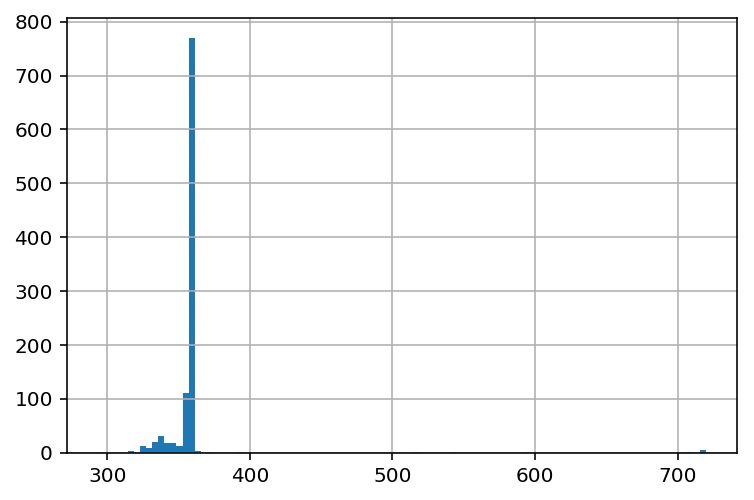

In [7]:
pd.Series([len(u) for u in repr_units]).hist(bins=100)

In [16]:
repr_units = list(filter(lambda x: 320 <=len(x) <= 370, repr_units))

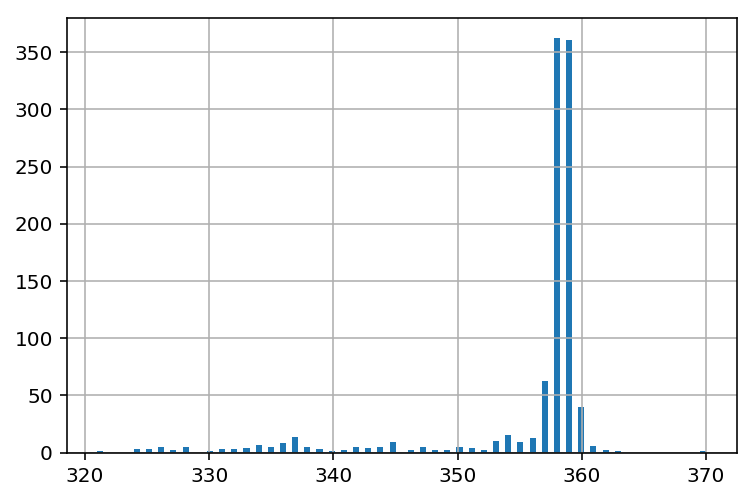

In [17]:
pd.Series([len(u) for u in repr_units]).hist(bins=100)

In [18]:
len(repr_units)

1003

In [19]:
c = ClusteringSeq(repr_units, revcomp=True, cyclic=True)

In [20]:
c.calc_dist_mat(n_core=20)

[I 190919 06:02:35 log:17] Starting distance matrix calculation 
[D 190919 06:02:36 seq:19] Computing row 0
[D 190919 06:02:36 seq:19] Computing row 976
[D 190919 06:02:36 seq:19] Computing row 51
[D 190919 06:02:36 seq:19] Computing row 925
[D 190919 06:02:36 seq:19] Computing row 874
[D 190919 06:02:36 seq:19] Computing row 102
[D 190919 06:02:36 seq:19] Computing row 823
[D 190919 06:02:36 seq:19] Computing row 153
[D 190919 06:02:36 seq:19] Computing row 204
[D 190919 06:02:36 seq:19] Computing row 255
[D 190919 06:02:36 seq:19] Computing row 772
[D 190919 06:02:36 seq:19] Computing row 721
[D 190919 06:02:36 seq:19] Computing row 306
[D 190919 06:02:36 seq:19] Computing row 670
[D 190919 06:02:36 seq:19] Computing row 26
[D 190919 06:02:36 seq:19] Computing row 357
[D 190919 06:02:36 seq:19] Computing row 619
[D 190919 06:02:36 seq:19] Computing row 408
[D 190919 06:02:36 seq:19] Computing row 568
[D 190919 06:02:36 seq:19] Computing row 459
[D 190919 06:02:36 seq:19] Computing ro

[D 190919 06:02:38 seq:19] Computing row 438
[D 190919 06:02:38 seq:19] Computing row 972
[D 190919 06:02:38 seq:19] Computing row 30
[D 190919 06:02:38 seq:19] Computing row 463
[D 190919 06:02:38 seq:19] Computing row 412
[D 190919 06:02:38 seq:19] Computing row 489
[D 190919 06:02:38 seq:19] Computing row 336
[D 190919 06:02:39 seq:19] Computing row 387
[D 190919 06:02:39 seq:19] Computing row 742
[D 190919 06:02:39 seq:19] Computing row 920
[D 190919 06:02:39 seq:19] Computing row 691
[D 190919 06:02:39 seq:19] Computing row 895
[D 190919 06:02:39 seq:19] Computing row 538
[D 190919 06:02:39 seq:19] Computing row 563
[D 190919 06:02:39 seq:19] Computing row 793
[D 190919 06:02:39 seq:19] Computing row 640
[D 190919 06:02:39 seq:19] Computing row 767
[D 190919 06:02:39 seq:19] Computing row 260
[D 190919 06:02:39 seq:19] Computing row 82
[D 190919 06:02:39 seq:19] Computing row 818
[D 190919 06:02:39 seq:19] Computing row 107
[D 190919 06:02:39 seq:19] Computing row 844
[D 190919 06

[D 190919 06:02:41 seq:19] Computing row 86
[D 190919 06:02:41 seq:19] Computing row 9
[D 190919 06:02:41 seq:19] Computing row 188
[D 190919 06:02:41 seq:19] Computing row 865
[D 190919 06:02:41 seq:19] Computing row 213
[D 190919 06:02:41 seq:19] Computing row 534
[D 190919 06:02:41 seq:19] Computing row 162
[D 190919 06:02:41 seq:19] Computing row 315
[D 190919 06:02:41 seq:19] Computing row 239
[D 190919 06:02:41 seq:19] Computing row 137
[D 190919 06:02:42 seq:19] Computing row 585
[D 190919 06:02:42 seq:19] Computing row 967
[D 190919 06:02:42 seq:19] Computing row 35
[D 190919 06:02:42 seq:19] Computing row 290
[D 190919 06:02:42 seq:19] Computing row 942
[D 190919 06:02:42 seq:19] Computing row 661
[D 190919 06:02:42 seq:19] Computing row 60
[D 190919 06:02:42 seq:19] Computing row 366
[D 190919 06:02:42 seq:19] Computing row 494
[D 190919 06:02:42 seq:19] Computing row 443
[D 190919 06:02:42 seq:19] Computing row 610
[D 190919 06:02:42 seq:19] Computing row 468
[D 190919 06:02

[D 190919 06:02:44 seq:19] Computing row 733
[D 190919 06:02:44 seq:19] Computing row 345
[D 190919 06:02:44 seq:19] Computing row 886
[D 190919 06:02:44 seq:19] Computing row 758
[D 190919 06:02:44 seq:19] Computing row 784
[D 190919 06:02:44 seq:19] Computing row 682
[D 190919 06:02:44 seq:19] Computing row 911
[D 190919 06:02:45 seq:19] Computing row 116
[D 190919 06:02:45 seq:19] Computing row 269
[D 190919 06:02:45 seq:19] Computing row 503
[D 190919 06:02:45 seq:19] Computing row 91
[D 190919 06:02:45 seq:19] Computing row 396
[D 190919 06:02:45 seq:19] Computing row 244
[D 190919 06:02:45 seq:19] Computing row 835
[D 190919 06:02:45 seq:19] Computing row 529
[D 190919 06:02:45 seq:19] Computing row 218
[D 190919 06:02:45 seq:19] Computing row 554
[D 190919 06:02:45 seq:19] Computing row 707
[D 190919 06:02:45 seq:19] Computing row 631
[D 190919 06:02:45 seq:19] Computing row 320
[D 190919 06:02:45 seq:19] Computing row 988
[D 190919 06:02:45 seq:19] Computing row 167
[D 190919 0

[D 190919 06:02:47 seq:19] Computing row 780
[D 190919 06:02:47 seq:19] Computing row 477
[D 190919 06:02:47 seq:19] Computing row 576
[D 190919 06:02:47 seq:19] Computing row 197
[D 190919 06:02:48 seq:19] Computing row 146
[D 190919 06:02:48 seq:19] Computing row 601
[D 190919 06:02:48 seq:19] Computing row 753
[D 190919 06:02:48 seq:19] Computing row 375
[D 190919 06:02:48 seq:19] Computing row 222
[D 190919 06:02:48 seq:19] Computing row 728
[D 190919 06:02:48 seq:19] Computing row 452
[D 190919 06:02:48 seq:19] Computing row 350
[D 190919 06:02:48 seq:19] Computing row 881
[D 190919 06:02:48 seq:19] Computing row 249
[D 190919 06:02:48 seq:19] Computing row 426
[D 190919 06:02:48 seq:19] Computing row 702
[D 190919 06:02:48 seq:19] Computing row 401
[D 190919 06:02:48 seq:19] Computing row 274
[D 190919 06:02:48 seq:19] Computing row 524
[D 190919 06:02:48 seq:19] Computing row 121
[D 190919 06:02:48 seq:19] Computing row 830
[D 190919 06:02:48 seq:19] Computing row 906
[D 190919 

[D 190919 06:02:51 seq:19] Computing row 775
[D 190919 06:02:51 seq:19] Computing row 571
[D 190919 06:02:51 seq:19] Computing row 329
[D 190919 06:02:51 seq:19] Computing row 929
[D 190919 06:02:51 seq:19] Computing row 73
[D 190919 06:02:51 seq:19] Computing row 151
[D 190919 06:02:51 seq:19] Computing row 202
[D 190919 06:02:51 seq:19] Computing row 953
[D 190919 06:02:51 seq:19] Computing row 545
[D 190919 06:02:51 seq:19] Computing row 49
[D 190919 06:02:51 seq:19] Computing row 227
[D 190919 06:02:51 seq:19] Computing row 596
[D 190919 06:02:51 seq:19] Computing row 723
[D 190919 06:02:51 seq:19] Computing row 380
[D 190919 06:02:51 seq:19] Computing row 748
[D 190919 06:02:51 seq:19] Computing row 431
[D 190919 06:02:51 seq:19] Computing row 825
[D 190919 06:02:51 seq:19] Computing row 482
[D 190919 06:02:51 seq:19] Computing row 697
[D 190919 06:02:51 seq:19] Computing row 901
[D 190919 06:02:51 seq:19] Computing row 647
[D 190919 06:02:51 seq:19] Computing row 101
[D 190919 06

In [21]:
c.plot_tsne()

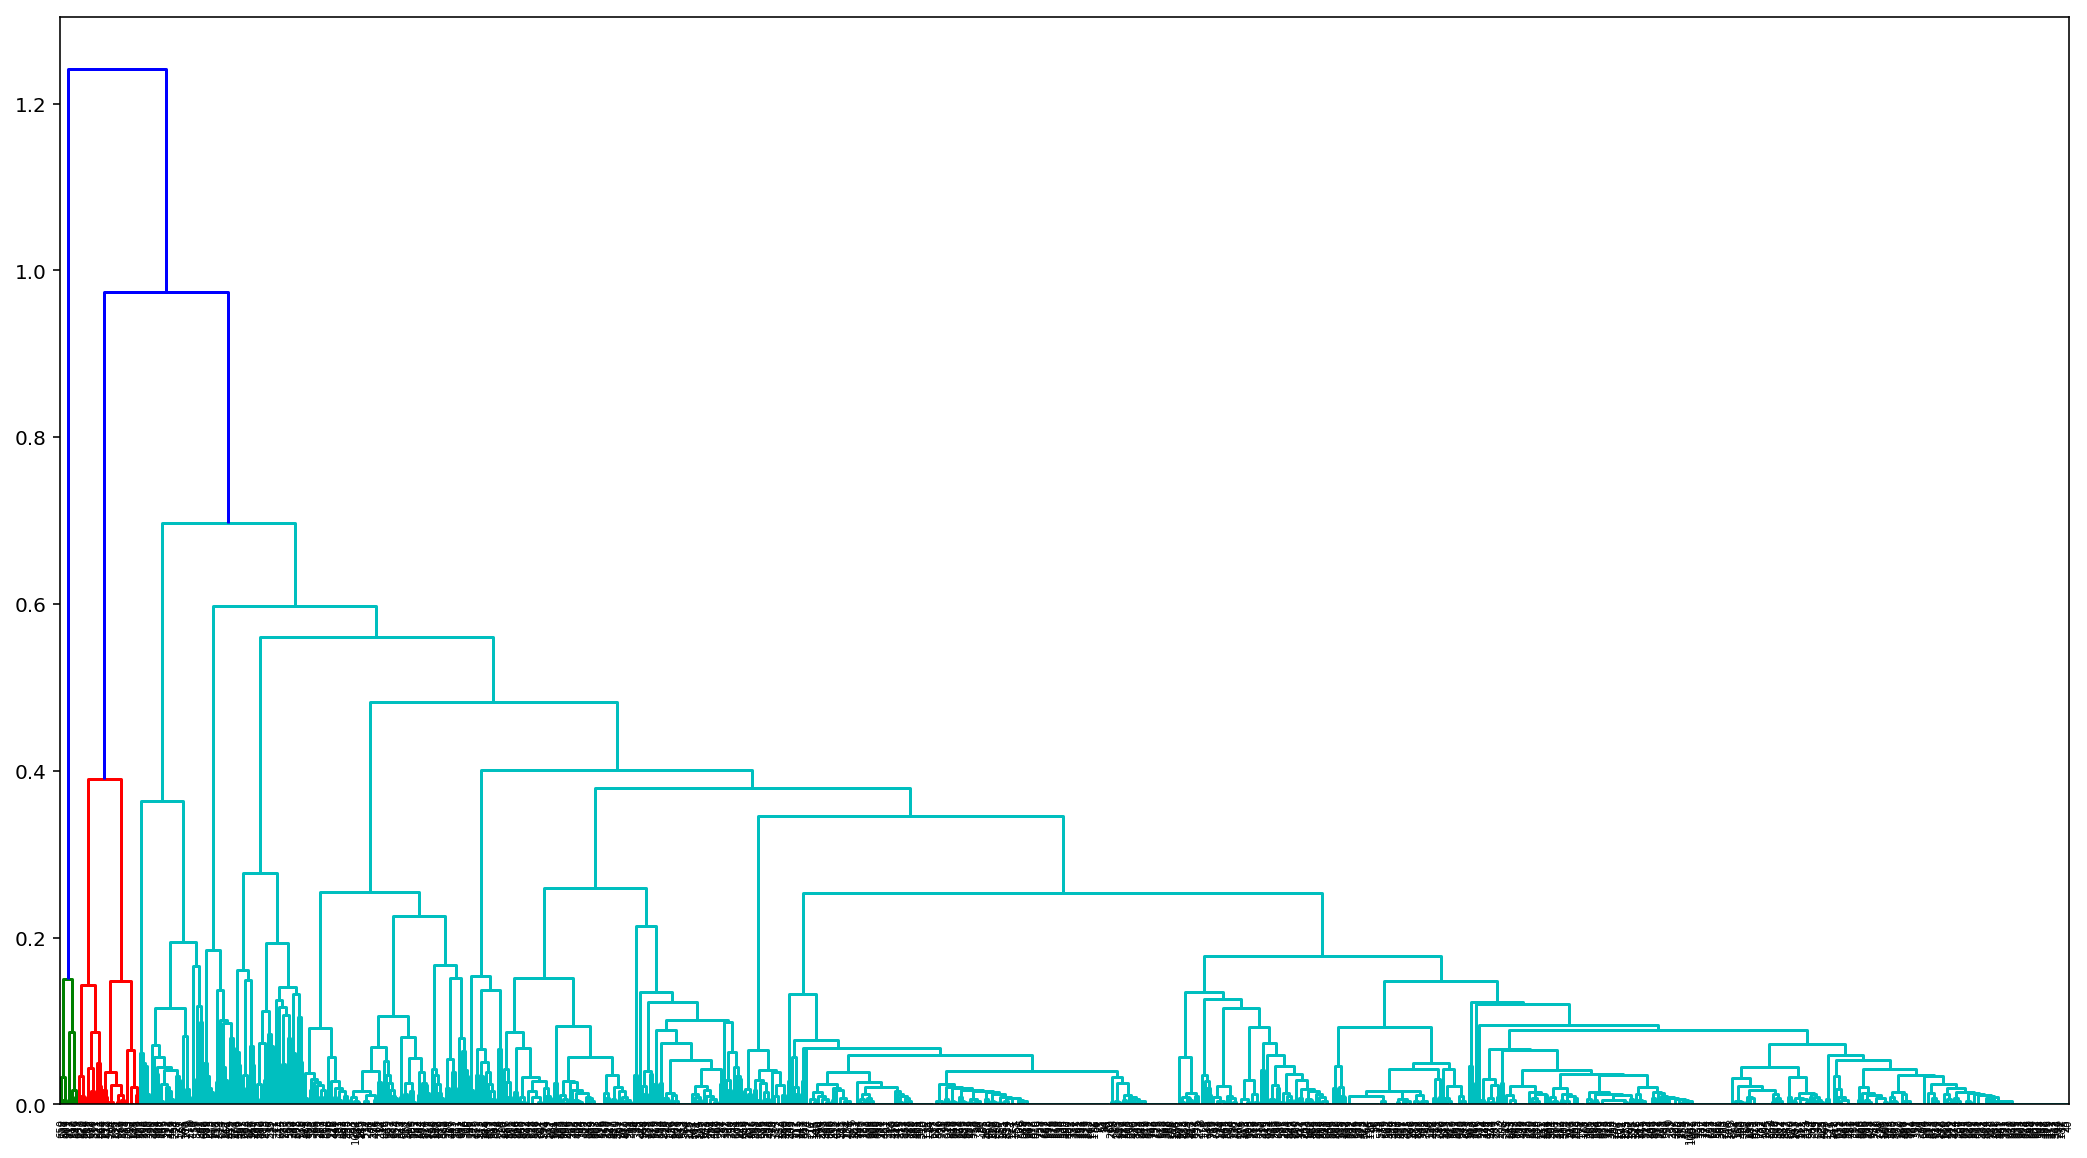

In [22]:
c.show_dendrogram()

In [35]:
c.cluster_hierarchical(threshold=0.2)

In [24]:
c.plot_tsne()

In [ ]:
c.generate_consensus()

In [38]:
cc = ClusteringSeq(list(c.cons_seqs.loc[:, "sequence"]), revcomp=False, cyclic=False)

In [39]:
cc.calc_dist_mat()

[I 190919 06:14:06 log:17] Starting distance matrix calculation 
[D 190919 06:14:06 seq:19] Computing row 0
[D 190919 06:14:06 seq:19] Computing row 4
[D 190919 06:14:06 seq:19] Computing row 1
[D 190919 06:14:06 seq:19] Computing row 3
[D 190919 06:14:06 seq:19] Computing row 2
[I 190919 06:14:06 log:19] Finished distance matrix calculation


In [40]:
cc.plot_dist_mat(variable_scale=True)

1つを除いて極端に数が少ないので、master は1つにして、 map しなかったら gap として扱えば良い。

In [43]:
master_unit = c.cons_seqs.loc[4]["sequence"]

In [45]:
!(echo {master_unit} > master_unit)

In [48]:
len(master_unit)

359

In [9]:
!(cat master_unit)

caaaaatgttgatatttacaaacgaaattttcgttataacttggctaaaaatggtcacatagatgtaagaataactgttttgagcagctaattaccagtgctaacgatccctattactttttgaaggatttagggaaattaatttttggatcaattttcgcattttttgtaaggaggggggtcatcaaaatttgcaaaatatggccaaaaaatttaatttccatttttgaacacagtttgattggaaattttattacgagctcagtgaggtatgacattccatattcagacaattattttttatgttgtggcaaaataaatgattatttgatgaccgaaatttggaaaaacagactctg


In [10]:
master_unit = "caaaaatgttgatatttacaaacgaaattttcgttataacttggctaaaaatggtcacatagatgtaagaataactgttttgagcagctaattaccagtgctaacgatccctattactttttgaaggatttagggaaattaatttttggatcaattttcgcattttttgtaaggaggggggtcatcaaaatttgcaaaatatggccaaaaaatttaatttccatttttgaacacagtttgattggaaattttattacgagctcagtgaggtatgacattccatattcagacaattattttttatgttgtggcaaaataaatgattatttgatgaccgaaatttggaaaaacagactctg"

## Synchronize all units

In [7]:
centromere_reads = load_pickle("centromere_reads_incl_low_cover_rate.pkl")

In [11]:
for read in centromere_reads:
    read.repr_units = {0: master_unit, 1: revcomp(master_unit)}

In [12]:
def synchronize_units(read, map_threshold=0.1):
    logger.info(f"read {read.id}")
    # Map the representative units to the read iteratively
    er = EdlibRunner("glocal", revcomp=False, cyclic=False)
    sync_units = []
    read_seq = copy(read.seq)
    while True:
        mappings = [(er.align(repr_unit, read_seq), repr_id)
                    for repr_id, repr_unit in sorted(read.repr_units.items())]   # TODO: skip one of the two if not changed
        diffs = [mapping.diff for mapping, repr_id in mappings]
        if np.min(diffs) >= map_threshold:
            break
        mapping, repr_id = mappings[np.argmin(diffs)]

        flatten_cigar = mapping.cigar.flatten().string
        logger.debug(f"{mapping} strand={repr_id}")
        logger.debug(flatten_cigar)

        # Change all 'I' at the boundaries to 'X' so that variants can be captured
        start, end = mapping.t_start, mapping.t_end
        assert flatten_cigar[0] != 'D' and flatten_cigar[-1] != 'D', "Boundary deletion happened"
        insert_len = 0   # start side
        while flatten_cigar[insert_len] == 'I':
            insert_len += 1
        while insert_len > 0 and start > 0:
            start -= 1
            insert_len -= 1
            insert_len = 0   # end side
        while flatten_cigar[-1 - insert_len] == 'I':
            insert_len += 1
        while insert_len > 0 and end < read.length:
            end += 1
            insert_len -= 1

        sync_units.append(TRUnit(start, end, id=repr_id))

        # Mask middle half sequence of the mapped region
        left = int(start + (end - start) / 4)
        right = int(end - (end - start) / 4)
        read_seq = read_seq[:left] + ('N' * (right - left)) + read_seq[right:]

    sync_units.sort(key=lambda x: x.start)

    # Resolve the conflict on the overlapping mapped regions
    er = EdlibRunner("global", revcomp=False, cyclic=False)
    for i in range(len(sync_units) - 1):
        j = i + 1
        if sync_units[i].end > sync_units[j].start:
            overlap_len = sync_units[i].end - sync_units[j].start
            logger.debug(f"conflict {sync_units[i]} and {sync_units[j]} ({overlap_len} bp)")

            # Cut out the overlapping sequeces from both units
            unit_seq = read.seq[sync_units[i].start:sync_units[i].end]
            alignment = er.align(unit_seq, read.repr_units[sync_units[i].id])
            logger.debug(alignment.cigar.flatten().string)
            up_seq = alignment.cigar.flatten().string[-overlap_len:]   # from unit of upper side

            unit_seq = read.seq[sync_units[j].start:sync_units[j].end]
            alignment = er.align(unit_seq, read.repr_units[sync_units[i].id])
            logger.debug(alignment.cigar.flatten().string)
            down_seq = alignment.cigar.flatten().string[:overlap_len]   # from unit of down side

            logger.debug(up_seq)
            logger.debug(down_seq)

            # Calculate the position where the total number of matches is maximized
            max_pos = 0
            max_score = 0
            for x in range(overlap_len + 1):
                score = Counter(up_seq[:x])['='] + Counter(down_seq[x:])['=']
                #logger.debug(f"pos {x}, score {score}")
                if (max_score < score) or (max_score == score and up_seq[x - 1] > down_seq[x - 1]):
                    max_score = score
                    max_pos = x
            logger.debug(f"max pos {max_pos}, max score {max_score}")

            # Redefine the boundaries as the best position
            sync_units[i].end -= (overlap_len - x)
            sync_units[j].start += x

    read.units = sync_units
    read.synchronized = True
    return read

In [13]:
with NoDaemonPool(20) as pool:
    sync_reads = pool.map(synchronize_units, centromere_reads)

[I 190919 18:47:58 <ipython-input-12-1949f1ce94ed>:2] read 73
[I 190919 18:47:58 <ipython-input-12-1949f1ce94ed>:2] read 3571
[I 190919 18:47:58 <ipython-input-12-1949f1ce94ed>:2] read 7333
[I 190919 18:47:58 <ipython-input-12-1949f1ce94ed>:2] read 10305
[I 190919 18:47:58 <ipython-input-12-1949f1ce94ed>:2] read 15230
[I 190919 18:47:58 <ipython-input-12-1949f1ce94ed>:2] read 19539
[I 190919 18:47:58 <ipython-input-12-1949f1ce94ed>:2] read 22783
[I 190919 18:47:58 <ipython-input-12-1949f1ce94ed>:2] read 26555
[I 190919 18:47:58 <ipython-input-12-1949f1ce94ed>:2] read 31865
[I 190919 18:47:58 <ipython-input-12-1949f1ce94ed>:2] read 37430
[I 190919 18:47:58 <ipython-input-12-1949f1ce94ed>:2] read 7454
[I 190919 18:47:58 <ipython-input-12-1949f1ce94ed>:2] read 44025
[I 190919 18:47:58 <ipython-input-12-1949f1ce94ed>:2] read 52012
[I 190919 18:47:58 <ipython-input-12-1949f1ce94ed>:2] read 59001
[I 190919 18:47:58 <ipython-input-12-1949f1ce94ed>:2] read 10757
[I 190919 18:47:58 <ipython-inp

[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 67364
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 62272
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 99318
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 82247
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 33279
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 88648
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 4194
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 38153
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 67720
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 33523
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 16873
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 52749
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 94197
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 7758
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 11472
[I 190919 18:47:59 <ipython

[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 25482
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 29227
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 12995
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 101320
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 34988
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 5298
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 63719
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 21465
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 76930
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 18025
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 90313
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 8877
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 69907
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 21611
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 69925
[I 190919 18:47:59 <ipytho

[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 56640
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 6059
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 14547
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 102353
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 14647
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 86550
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 96908
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 42312
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 25962
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 80630
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 73755
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 21995
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 9361
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 22141
[I 190919 18:47:59 <ipython-input-12-1949f1ce94ed>:2] read 9396
[I 190919 18:47:59 <ipython

[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 87619
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 6796
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 111817
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 169919
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 31379
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 170019
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 139558
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 175334
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 120364
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 57607
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 182687
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 126349
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 133202
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 104570
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 188521
[I 190919 18:48

[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 146806
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 166307
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 147019
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 171626
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 219903
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 202130
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 152125
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 190537
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 214796
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 171837
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 209267
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 113767
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 177438
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 166365
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 113773
[I 190919 

[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 161079
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 132458
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 216204
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 185243
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 191307
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 178666
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 148132
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 229572
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 117244
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 173580
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 210400
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 135799
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 210412
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 141386
[I 190919 18:48:00 <ipython-input-12-1949f1ce94ed>:2] read 220673
[I 190919 

[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 234119
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 193209
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 205035
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 211461
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 230404
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 231610
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 244759
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 217531
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 148684
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 142671
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 221798
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 186575
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 187075
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 163901
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 180566
[I 190919 

[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 246507
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 277447
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 303176
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 250782
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 223098
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 296325
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 271997
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 287390
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 296386
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 212673
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 213033
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 200430
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 232360
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 282597
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 292327
[I 190919 

[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 329169
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 283419
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 251485
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 313880
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 268353
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 251509
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 313968
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 251768
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 263896
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 322814
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 293222
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 323038
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 251883
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 289190
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 308678
[I 190919 

[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 324865
[I 190919 18:48:01 <ipython-input-12-1949f1ce94ed>:2] read 290722
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 265195
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 273985
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 243896
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 331281
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 331596
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 248420
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 253082
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 315734
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 305556
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 310478
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 259686
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 294236
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 284346
[I 190919 

[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 334300
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 327401
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 306786
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 334590
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 265734
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 295137
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 285801
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 348123
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 270830
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 353221
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 276326
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 311507
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 320446
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 291454
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 327599
[I 190919 

[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 407035
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 391826
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 418609
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 370400
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 354356
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 387162
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 349821
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 391947
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 425457
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 339418
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 335853
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 413641
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 399313
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 418697
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 365241
[I 190919 

[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 436104
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 394006
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 372094
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 360610
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 408790
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 356006
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 356199
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 426454
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 340764
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 388752
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 382134
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 352440
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 420395
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 336646
[I 190919 18:48:02 <ipython-input-12-1949f1ce94ed>:2] read 378049
[I 190919 

[I 190919 18:48:03 <ipython-input-12-1949f1ce94ed>:2] read 443417
[I 190919 18:48:03 <ipython-input-12-1949f1ce94ed>:2] read 433198
[I 190919 18:48:03 <ipython-input-12-1949f1ce94ed>:2] read 353168
[I 190919 18:48:03 <ipython-input-12-1949f1ce94ed>:2] read 382694
[I 190919 18:48:03 <ipython-input-12-1949f1ce94ed>:2] read 433248
[I 190919 18:48:03 <ipython-input-12-1949f1ce94ed>:2] read 382910
[I 190919 18:48:03 <ipython-input-12-1949f1ce94ed>:2] read 362878
[I 190919 18:48:03 <ipython-input-12-1949f1ce94ed>:2] read 410517
[I 190919 18:48:03 <ipython-input-12-1949f1ce94ed>:2] read 367909
[I 190919 18:48:03 <ipython-input-12-1949f1ce94ed>:2] read 421628
[I 190919 18:48:03 <ipython-input-12-1949f1ce94ed>:2] read 394694
[I 190919 18:48:03 <ipython-input-12-1949f1ce94ed>:2] read 337977
[I 190919 18:48:03 <ipython-input-12-1949f1ce94ed>:2] read 353190
[I 190919 18:48:03 <ipython-input-12-1949f1ce94ed>:2] read 390081
[I 190919 18:48:03 <ipython-input-12-1949f1ce94ed>:2] read 422380
[I 190919 

[I 190919 18:48:03 <ipython-input-12-1949f1ce94ed>:2] read 385631
[I 190919 18:48:03 <ipython-input-12-1949f1ce94ed>:2] read 424390
[I 190919 18:48:03 <ipython-input-12-1949f1ce94ed>:2] read 424406
[I 190919 18:48:03 <ipython-input-12-1949f1ce94ed>:2] read 412471
[I 190919 18:48:03 <ipython-input-12-1949f1ce94ed>:2] read 429430
[I 190919 18:48:03 <ipython-input-12-1949f1ce94ed>:2] read 406778
[I 190919 18:48:03 <ipython-input-12-1949f1ce94ed>:2] read 434876
[I 190919 18:48:03 <ipython-input-12-1949f1ce94ed>:2] read 429479
[I 190919 18:48:03 <ipython-input-12-1949f1ce94ed>:2] read 439929
[I 190919 18:48:03 <ipython-input-12-1949f1ce94ed>:2] read 418280
[I 190919 18:48:03 <ipython-input-12-1949f1ce94ed>:2] read 435011
[I 190919 18:48:03 <ipython-input-12-1949f1ce94ed>:2] read 424415
[I 190919 18:48:03 <ipython-input-12-1949f1ce94ed>:2] read 412965
[I 190919 18:48:03 <ipython-input-12-1949f1ce94ed>:2] read 429598
[I 190919 18:48:03 <ipython-input-12-1949f1ce94ed>:2] read 440479
[I 190919 

In [14]:
save_pickle(sync_reads, "centromere_reads_incl_low_cover_rate_all_sync.pkl")

In [15]:
sync_reads = load_pickle("centromere_reads_incl_low_cover_rate_all_sync.pkl")

In [5]:
db_prefix = "DMEL_CSS"
db_fname = f"{db_prefix}.db"
las_fname = f"TAN.{db_prefix}.las"
from vca import ReadViewer
v = ReadViewer(db_fname, las_fname)

In [6]:
for i in range(10):
    v.show(read=sync_reads[i])

[I 190919 17:56:41 log:17] Starting distance matrix calculation 
[I 190919 17:56:41 log:19] Finished distance matrix calculation


[I 190919 17:56:43 log:17] Starting distance matrix calculation 
[I 190919 17:56:43 log:19] Finished distance matrix calculation


[I 190919 17:56:43 log:17] Starting distance matrix calculation 
[I 190919 17:56:43 log:19] Finished distance matrix calculation


[I 190919 17:56:44 log:17] Starting distance matrix calculation 
[I 190919 17:56:44 log:19] Finished distance matrix calculation


[I 190919 17:56:46 log:17] Starting distance matrix calculation 
[I 190919 17:56:46 log:19] Finished distance matrix calculation


[I 190919 17:56:47 log:17] Starting distance matrix calculation 
[I 190919 17:56:47 log:19] Finished distance matrix calculation


[I 190919 17:56:48 log:17] Starting distance matrix calculation 
[I 190919 17:56:49 log:19] Finished distance matrix calculation


[I 190919 17:56:50 log:17] Starting distance matrix calculation 
[I 190919 17:56:50 log:19] Finished distance matrix calculation


[I 190919 17:56:52 log:17] Starting distance matrix calculation 
[I 190919 17:56:52 log:19] Finished distance matrix calculation


[I 190919 17:56:53 log:17] Starting distance matrix calculation 
[I 190919 17:56:53 log:19] Finished distance matrix calculation


## Conclusion

ここからが勝負。いかにして locally sensitive feature を設計して overlap filtering を行うか？

データは `centromere_reads_incl_low_cover_rate_all_sync.pkl` を使う。